In [1]:
!wget https://mettl-arq.s3-ap-southeast-1.amazonaws.com/questions/jp-morgan/quant-challenge-2020/derivatives-modelling/Q1_Data.csv

--2020-09-27 13:34:17--  https://mettl-arq.s3-ap-southeast-1.amazonaws.com/questions/jp-morgan/quant-challenge-2020/derivatives-modelling/Q1_Data.csv
Resolving mettl-arq.s3-ap-southeast-1.amazonaws.com (mettl-arq.s3-ap-southeast-1.amazonaws.com)... 52.219.36.235
Connecting to mettl-arq.s3-ap-southeast-1.amazonaws.com (mettl-arq.s3-ap-southeast-1.amazonaws.com)|52.219.36.235|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1121 (1.1K) [text/csv]
Saving to: ‘Q1_Data.csv.2’

Q1_Data.csv.2       100%[===================>]   1.09K  --.-KB/s    in 0s      

2020-09-27 13:34:18 (70.1 MB/s) - ‘Q1_Data.csv.2’ saved [1121/1121]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [3]:
dataframe = pd.read_csv('/content/data.csv')

In [59]:
dataframe.head()

,Date,Price,Dates
0,10/31/2020,520.349403,2020-10-31
1,11/30/2020,524.764215,2020-11-30
2,12/31/2020,574.740259,2020-12-31
3,1/31/2021,602.355246,2021-01-31
4,2/28/2021,593.415544,2021-02-28


In [5]:
numpoints = dataframe['Date'].size
print(numpoints)
months = [i for i in range(numpoints)]
prices = dataframe['Price']

48


In [6]:
print(len(prices))
print(len(months))

48
48


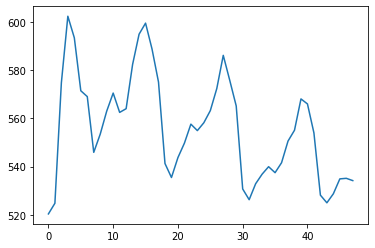

In [7]:
plt.plot(months, prices)

We can observe the seasonality. We can observe a similar pattern repeating. This is called a period. We can observe that each period has almost 4 different points, where the first derivative is 0(subgradient due to peak). These points are considered as anchor points.

In [8]:
# Grouping anchor points
anchor1 = [min(prices[0:8]), min(prices[5:10]), min(prices[15:25]), min(prices[27:35]), min(prices[40:])]
anchor2 = [prices[1], (prices[11]+prices[12])/2, (prices[22]+prices[23])/2, (prices[34]+prices[35])/2, prices[46]]
anchor3 = [max(prices[2:8]), max(prices[12:18]), max(prices[20:30]), max(prices[35:40])]
anchor4 = [(prices[5]+prices[6])/2, (prices[17]+prices[18])/2, (prices[29]+prices[30])/2, (prices[41]+prices[42])/2]

In [9]:
print(anchor1)
print(anchor2)
print(anchor3)
print(anchor4)

[520.3494032, 545.8955607, 535.4571411999999, 526.2513983, 524.9593148]
[524.7642146000001, 563.2336299000001, 556.25304175, 538.69717895, 535.1171913]
[602.3552461, 599.4953259, 586.1306276, 568.0591059999999]
[570.2334389499999, 558.15265535, 547.92094995, 541.0415932999999]


In [35]:
# We can observe that every anchor almost repeats itself after 12 months
# x1 = [0, 7, 19, 31, 43]
# x2 = [1, 11.5, 22.5, 34.5, 46]
# x3 = [3, 15, 27, 39]
# x4 = [5.5, 17.5, 29.5, 41.5]

x1 = [0, 12, 24, 36, 48]
x2 = [1, 13, 25, 37, 48]
x3 = [3, 15, 27, 39]
x4 = [5.5, 17.5, 29.5, 41.5]

In [36]:
f1 = interp1d(x1, anchor1, kind='cubic', fill_value="extrapolate")
f2 = interp1d(x2, anchor2, kind='cubic', fill_value="extrapolate")
f3 = interp1d(x3, anchor3, kind='cubic', fill_value="extrapolate")
f4 = interp1d(x4, anchor4, kind='cubic', fill_value="extrapolate")

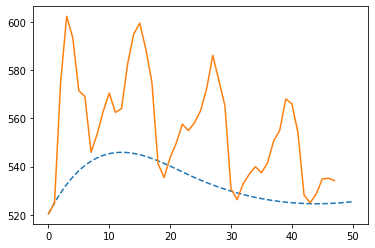

In [37]:
xtemp = np.linspace(0, 50, num=100, endpoint=True)
ytemp = f1(xtemp)
plt.plot(xtemp, ytemp, '--')
plt.plot(months, prices)
# plt.scatter(x1+12, f1(x1[-1])+12)

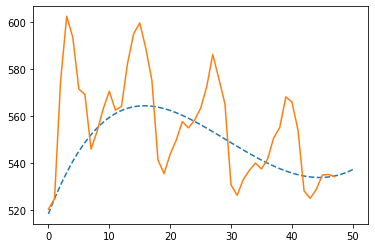

In [38]:
xtemp = np.linspace(0, 50, num=100, endpoint=True)
ytemp = f2(xtemp)
plt.plot(xtemp, ytemp, '--')
plt.plot(months, prices)

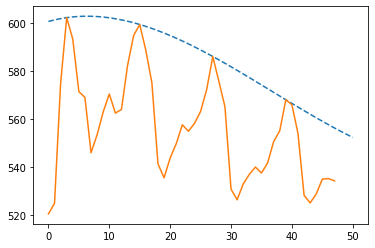

In [39]:
xtemp = np.linspace(0, 50, num=100, endpoint=True)
ytemp = f3(xtemp)
plt.plot(xtemp, ytemp, '--')
plt.plot(months, prices)

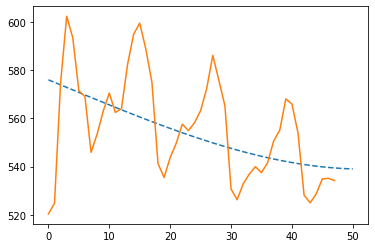

In [40]:
xtemp = np.linspace(0, 50, num=100, endpoint=True)
ytemp = f4(xtemp)
plt.plot(xtemp, ytemp, '--')
plt.plot(months, prices)

530.6278057999991


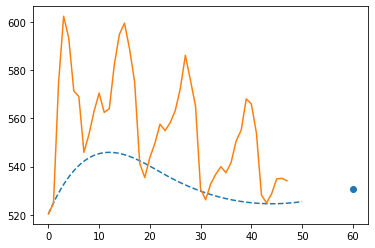

In [56]:
xtemp = np.linspace(0, 50, num=100, endpoint=True)
ytemp = f1(xtemp)
plt.plot(xtemp, ytemp, '--')
plt.plot(months, prices)
plt.scatter(x1[-1]+12, f1(x1[-1]+12))
print(f1(x1[-1]+12))

566.3918767017867


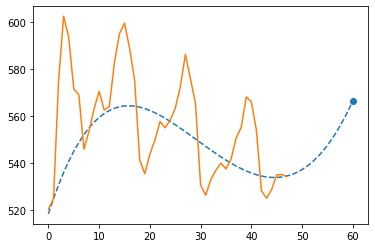

In [55]:
xtemp = np.linspace(0, 60, num=100, endpoint=True)
ytemp = f2(xtemp)
plt.plot(xtemp, ytemp, '--')
plt.plot(months, prices)
plt.scatter(x2[-1]+12, f2(x2[-1]+12))
print(f2(x2[-1]+12))

551.0787158999996


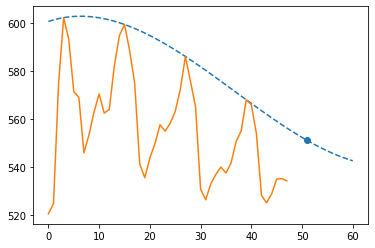

In [54]:
xtemp = np.linspace(0, 60, num=100, endpoint=True)
ytemp = f3(xtemp)
plt.plot(xtemp, ytemp, '--')
plt.plot(months, prices)
plt.scatter(x3[-1]+12, f3(x3[-1]+12))
print(f3(x3[-1]+12))

539.0178559499996


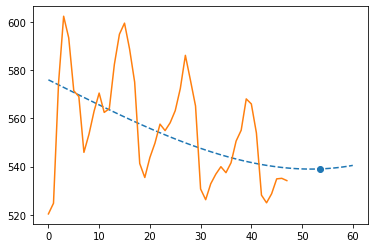

In [53]:
xtemp = np.linspace(0, 60, num=100, endpoint=True)
ytemp = f4(xtemp)
plt.plot(xtemp, ytemp, '--')
plt.plot(months, prices)
plt.scatter(x4[-1]+12, f4(x4[-1]+12))
print(f4(x4[-1]+12))

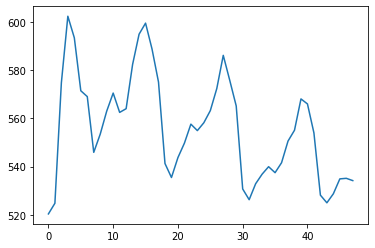

In [45]:
plt.plot(months, prices)

Done Interpolation of anchor data points, now we have to upsample the data from monthly frequency to daily frequency.

In [71]:
# 530.6278057999991 extrapolated anchor1
# 566.3918767017867 extrapolated anchor2
# 551.0787158999996 extrapolated anchor3
# 539.0178559499996 extrapolated anchor4
print(x1[-1], x2[-1], x3[-1], x4[-1])
# print(dataframe['Dates'])
print(dataframe['Dates'][x1[-1]-1])
print(dataframe['Dates'][x2[-1]-1])
print(dataframe['Dates'][x3[-1]-1])
print(dataframe['Dates'][41-1])

48 48 39 41.5
2024-09-30 00:00:00
2024-09-30 00:00:00
2023-12-31 00:00:00
2024-02-29 00:00:00


In [46]:
# upsampled = dataframe.resample('D')
dataframe['Dates'] = pd.to_datetime(dataframe['Date'])

In [47]:
print(dataframe.head())

         Date       Price      Dates
0  10/31/2020  520.349403 2020-10-31
1  11/30/2020  524.764215 2020-11-30
2  12/31/2020  574.740259 2020-12-31
3   1/31/2021  602.355246 2021-01-31
4   2/28/2021  593.415544 2021-02-28


In [48]:
dataframe2 = dataframe.filter(['Dates'], axis=1)
dataframe2['prices'] = dataframe['Price']

In [49]:
print(dataframe2.head())

       Dates      prices
0 2020-10-31  520.349403
1 2020-11-30  524.764215
2 2020-12-31  574.740259
3 2021-01-31  602.355246
4 2021-02-28  593.415544


In [50]:
dataframe2.to_csv('data2.csv', index = False)

In [51]:
df = pd.read_csv("/content/data2.csv", parse_dates =["Dates"], index_col ="Dates") 

In [52]:
print(df.head())

                prices
Dates                 
2020-10-31  520.349403
2020-11-30  524.764215
2020-12-31  574.740259
2021-01-31  602.355246
2021-02-28  593.415544


In [28]:
df = df.resample('D').mean()

In [62]:
print(df.head(-5))

                prices
Dates                 
2020-10-31  520.349403
2020-11-30  524.764215
2020-12-31  574.740259
2021-01-31  602.355246
2021-02-28  593.415544
2021-03-31  571.447877
2021-04-30  569.019001
2021-05-31  545.895561
2021-06-30  553.442208
2021-07-31  562.967452
2021-08-31  570.480785
2021-09-30  562.464808
2021-10-31  564.002452
2021-11-30  582.373944
2021-12-31  594.905887
2022-01-31  599.495326
2022-02-28  588.745560
2022-03-31  575.045262
2022-04-30  541.260049
2022-05-31  535.457141
2022-06-30  543.726841
2022-07-31  549.700044
2022-08-31  557.592587
2022-09-30  554.913496
2022-10-31  558.172072
2022-11-30  563.198033
2022-12-31  572.359220
2023-01-31  586.130628
2023-02-28  575.777942
2023-03-31  565.142541
2023-04-30  530.699358
2023-05-31  526.251398
2023-06-30  532.867979
2023-07-31  536.843057
2023-08-31  539.938075
2023-09-30  537.456283
2023-10-31  541.580217
2023-11-30  550.569780
2023-12-31  555.067110
2024-01-31  568.059106
2024-02-29  565.981108
2024-03-31 

Using resample function of Pandas, created dates

In [30]:
interpolated = df.interpolate(method='spline', order=3)

In [31]:
print(interpolated.head(32))

                prices
Dates                 
2020-10-31  520.349403
2020-11-01  519.035053
2020-11-02  517.863305
2020-11-03  516.812966
2020-11-04  515.881433
2020-11-05  515.066103
2020-11-06  514.364374
2020-11-07  513.773643
2020-11-08  513.291308
2020-11-09  512.914766
2020-11-10  512.641414
2020-11-11  512.468651
2020-11-12  512.393874
2020-11-13  512.414479
2020-11-14  512.527866
2020-11-15  512.731430
2020-11-16  513.022570
2020-11-17  513.398683
2020-11-18  513.857167
2020-11-19  514.395419
2020-11-20  515.010837
2020-11-21  515.700817
2020-11-22  516.462758
2020-11-23  517.294058
2020-11-24  518.192112
2020-11-25  519.154320
2020-11-26  520.178079
2020-11-27  521.260785
2020-11-28  522.399837
2020-11-29  523.592632
2020-11-30  524.764215
2020-12-01  526.129041


In [32]:
interpolated['prices']

Dates
2020-10-31    520.349403
2020-11-01    519.035053
2020-11-02    517.863305
2020-11-03    516.812966
2020-11-04    515.881433
                 ...    
2024-09-26    533.915691
2024-09-27    533.972263
2024-09-28    534.039094
2024-09-29    534.116559
2024-09-30    534.169278
Freq: D, Name: prices, Length: 1431, dtype: float64

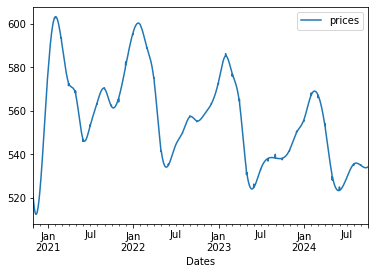

In [61]:
interpolated.plot()